# Analysis of outputs

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Read in `csvs`

In [2]:
# path to output directory
dir = "../../output/"
# find the input csv files
filepaths = [f for f in os.listdir(dir) if (f.startswith('input') and f.endswith('.csv'))]
# append the directory path to filename
filepaths_dir = [dir + filepath for filepath in filepaths]

# create empty list to append dataframes
dfs = []
for file in filepaths_dir:
    # read in files
    output=pd.read_csv(file)
    # Get the index date from the filename
    index_date = pd.to_datetime(file.split("_", )[1].split(".csv")[0], dayfirst=True)
    # Add the index date to the file
    output["index_date"] = index_date
    # Append the dataframes to the list
    dfs.append(output)

# Combine all the dataframes together
population_df = pd.concat(dfs)

## Create dataframe of sums of pulse oximetry codes for each index week

In [3]:
# Create lists of current and required headers
# Convert pulse oximetry codelist csv into data frame
oximetry_codes_df = pd.read_csv('../../codelists/opensafely-pulse-oximetry.csv')
# Extract list of SNOMED codes
oximetry_codes_list = oximetry_codes_df['code'].tolist()
# List of pulse oximetry headers in population dataframe
oximetry_codes_headers = [f'pulse_oximetry_{x}' for x in oximetry_codes_list]
# List of headers using descriptions as required
oximetry_headers = oximetry_codes_df['term'].tolist()

# Create dictionary for renaming oximetry headers
oximetry_dictionary = {}
for n in range(0,len(oximetry_codes_df)):
    oximetry_dictionary[oximetry_codes_headers[n]] = oximetry_headers[n]

#Create data frame of sum totals for each index date for each oximetry code
oximetry_sum = population_df.groupby(['index_date'], as_index=False)[oximetry_codes_headers].sum()

# Rename oximetry headers in oximetry sums data frame
oximetry_sum.rename(columns=oximetry_dictionary,inplace=True)

# Save the dataframe in outputs folder
oximetry_sum.to_csv('../../output/oximetry_sums.csv') 


## Create timeseries of pulse oximetry code sums

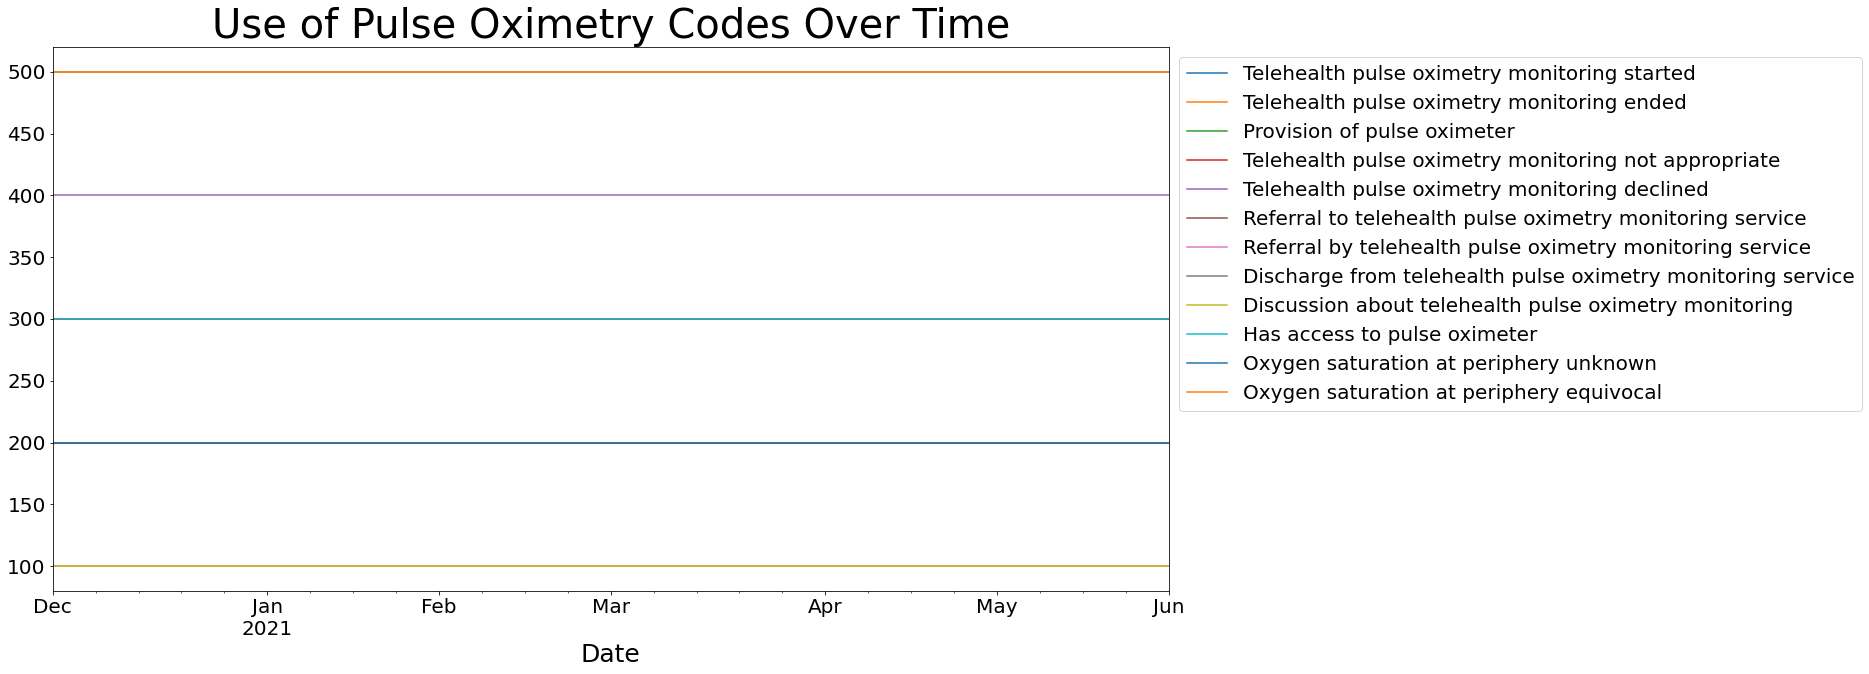

In [4]:
# Create plot
plot_1 = oximetry_sum.plot.line('index_date',oximetry_headers, figsize=(20, 10), fontsize = 20).get_figure()
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize = 20)
plt.xlabel("Date", fontsize = 25)
plt.title('Use of Pulse Oximetry Codes Over Time', fontsize = 40)
plot_1.savefig("../../output/oximetry_timeseries.png", bbox_inches ="tight")
